In [1]:
!pip install -q kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sims22/irisflowerdatasets

  0% 0.00/1.98k [00:00<?, ?B/s]
100% 1.98k/1.98k [00:00<00:00, 3.61MB/s]


In [4]:
!unzip /content/irisflowerdatasets.zip

Archive:  /content/irisflowerdatasets.zip
  inflating: IRIS.csv                
  inflating: IRIS1.csv               


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
irisdf=pd.read_csv('/content/IRIS.csv')
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
irisdf.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


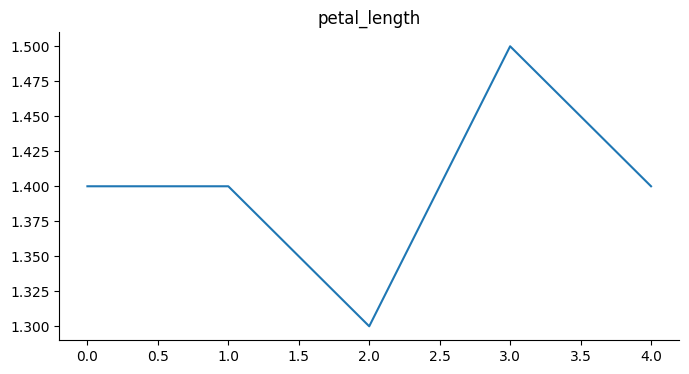

In [10]:
from matplotlib import pyplot as plt
_df_11['petal_length'].plot(kind='line', figsize=(8, 4), title='petal_length')
plt.gca().spines[['top', 'right']].set_visible(False)

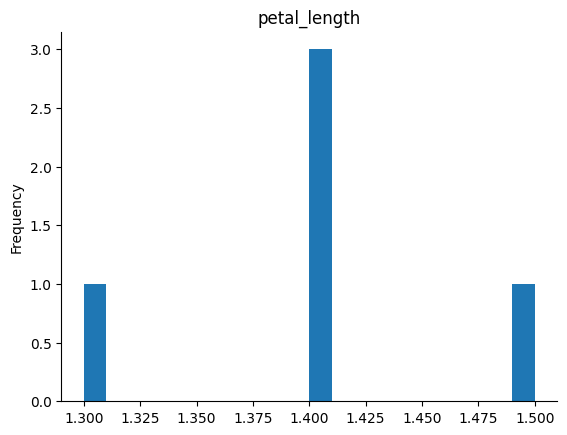

In [9]:
from matplotlib import pyplot as plt
_df_2['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

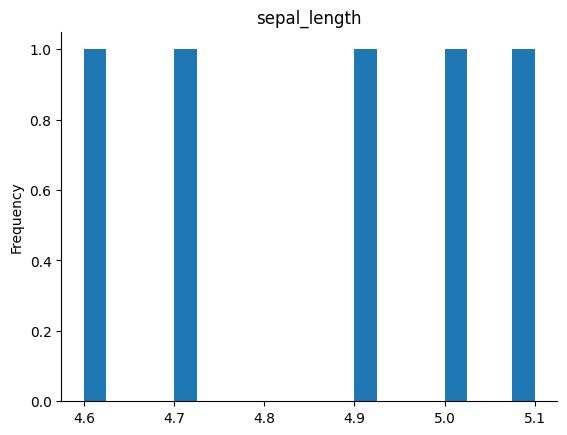

In [8]:
from matplotlib import pyplot as plt
_df_0['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris1df=pd.read_csv('/content/IRIS1.csv')
iris1df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,NaN,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  140 non-null    float64
 1   sepal_width   142 non-null    float64
 2   petal_length  137 non-null    float64
 3   petal_width   143 non-null    float64
 4   species       137 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
iris1df.drop_duplicates(inplace=True)
irisdf.drop_duplicates(inplace=True)

In [23]:
irisdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
iris1df.isnull().sum()

sepal_length    10
sepal_width      8
petal_length    13
petal_width      7
species         13
dtype: int64

In [27]:
iris1df['sepal_length'].fillna(value=iris1df['sepal_length'].mean(), inplace = True)
iris1df['sepal_width'].fillna(value=iris1df['sepal_width'].mean(),inplace=True)
iris1df['petal_length'].fillna(value=iris1df['petal_length'].mean(),inplace=True)
iris1df['petal_width'].fillna(value=iris1df['petal_width'].mean(),inplace=True)

In [28]:
iris1df.isnull().sum()

sepal_length     0
sepal_width      0
petal_length     0
petal_width      0
species         13
dtype: int64

In [29]:
iris1df = iris1df.dropna(axis = 0, how ='any')

In [30]:
print(iris1df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [31]:
iris1df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
irisdf['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
print(irisdf.shape,iris1df.shape)

(147, 5) (135, 5)


In [37]:
result_df = pd.concat([irisdf, iris1df], ignore_index=True)
result_df.shape

(282, 5)

In [42]:
setosa=result_df[result_df['species']=='Iris-setosa']
versicolor=result_df[result_df['species']=='Iris-versicolor']
virginica=result_df[result_df['species']=='Iris-virginica']

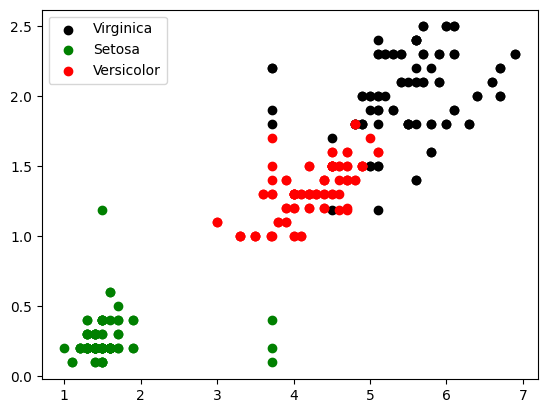

In [43]:
plt.scatter(virginica['petal_length'],virginica['petal_width'],color='k',label='Virginica')
plt.scatter(setosa['petal_length'],setosa['petal_width'],color='g',label='Setosa')
plt.scatter(versicolor['petal_length'],versicolor['petal_width'],color='r',label='Versicolor')
plt.legend()

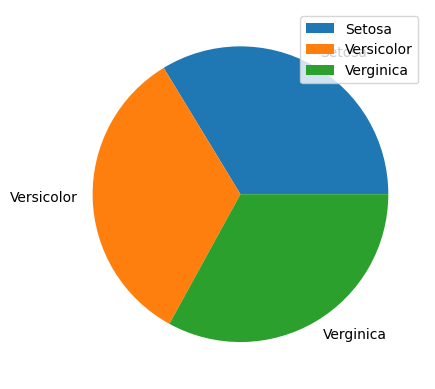

In [44]:
plt.pie(result_df['species'].value_counts(),labels=['Setosa','Versicolor','Verginica'])
plt.legend()

<ipython-input-58-c50bd71e74e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result_df.corr())


<Axes: >

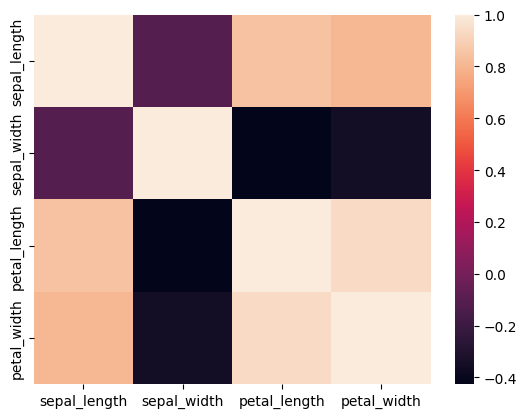

In [58]:
sns.heatmap(result_df.corr())

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [45]:
x=result_df.iloc[:,:4]
y=result_df.iloc[:,-1]

In [62]:
scaler = StandardScaler()
x=scaler.fit_transform(x)
encoder = LabelEncoder()
y= encoder.fit_transform(y)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
pred=model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
accuracy

0.9473684210526315

In [66]:
cm=confusion_matrix(y_test,pred)
cm

array([[17,  0,  0],
       [ 0, 20,  2],
       [ 0,  1, 17]])

In [77]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
pred=dtr.predict(x_test)
accuracy=accuracy_score(y_test,pred)
accuracy

0.9649122807017544

In [74]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
pre=rfr.predict(x_test)
acc=accuracy_score(y_test,pre)
acc

0.9649122807017544